<a href="https://colab.research.google.com/github/tranhuuan170302/Tran-Huu-An-data-analyst/blob/main/%5BB%C3%A0i_t%E1%BA%ADp%5D_X%C3%A2y_d%E1%BB%B1ng_m%C3%B4_h%C3%ACnh_h%E1%BB%93i_quy_tuy%E1%BA%BFn_t%C3%ADnh_d%E1%BB%B1_%C4%91o%C3%A1n_chi_ph%C3%AD_y_t%E1%BA%BF_c%C3%A1_nh%C3%A2n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/03/10172524/insurance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Vẽ biểu đồ để trực quan hóa mối quan hệ giữa tuổi của người được bảo hiểm (age)  với chi phí y tế (charges); và mối quan hệ giữa chỉ số trọng lượng cơ thể (bmi) với chi phí y tế (charges).

In [6]:
df1 = df[['age', 'charges', 'bmi']]

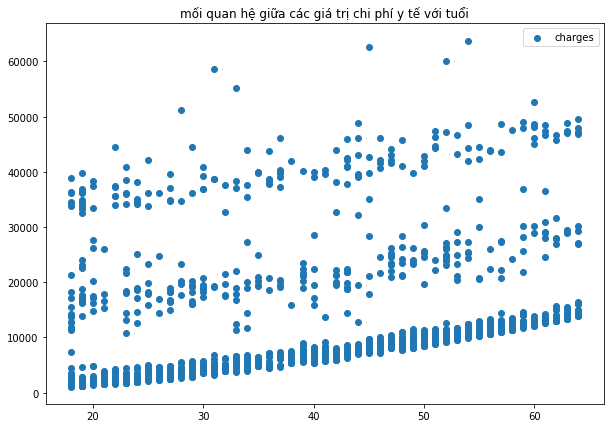

In [8]:
fig = plt.figure(figsize = (10, 7))
plt.scatter(df1['age'], df1['charges'], label = "charges")

plt.title("mối quan hệ giữa các giá trị chi phí y tế với tuổi")
plt.legend()
plt.show()

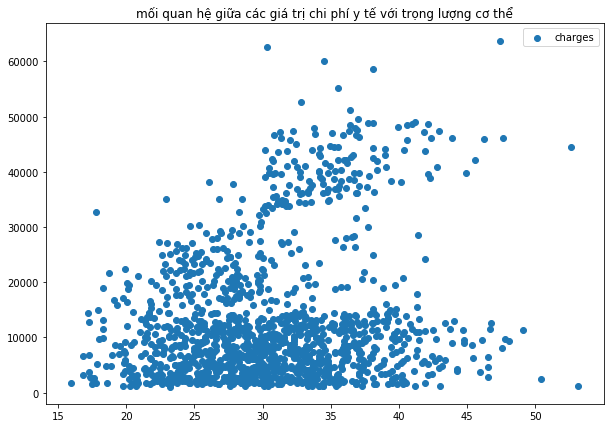

In [9]:
fig = plt.figure(figsize = (10, 7))
plt.scatter(df1['bmi'], df1['charges'], label = "charges")

plt.title("mối quan hệ giữa các giá trị chi phí y tế với trọng lượng cơ thể")
plt.legend()
plt.show()

## Chuyển các biến có kiểu categorical: sex, smoker, region thành các biến “Dummy”: sex_female , sex_male, smoker_no, smoker_yes, region_northeast  region_northwest region_southeast, region_southwest. Sau đó loại bớt 2 trường không cần thiết:  sex_male, smoker_no.

In [12]:
df = pd.get_dummies(df)

In [13]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [14]:
df.drop(['sex_female', 'sex_male'], axis=1, inplace=True)

In [15]:
df.head()

,age,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


## Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.

In [18]:
y = df['charges'].values
x = df.drop('charges', axis = 1).values
# chia bộ dữ liệu làm 2 tập train và test theo tỉ lệ 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [19]:
#Create a regressor object
LR= LinearRegression()

#Fit training set to the regressor
LR.fit(X_train,y_train)

print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
print("Intercept =", LR.intercept_)
print("Coefficients:", LR.coef_)

Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:
Intercept = -516.3589627667534
Coefficients: [   253.71289612    335.92334322    436.72852645 -11802.04839381
  11802.04839381    483.80313267    223.92508718   -429.78382223
   -277.94439762]


In [20]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [22]:
#Make predictions with the regressor
y_prediction = LR.predict(X_test)

In [26]:
y_pred = LR.predict(X_test)

In [27]:
# Calculate R2-score
import numpy as np
score=r2_score(y_test,y_pred)
print('R2-score is ',score)
print('Mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('Root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

R2-score is  0.7999608872686219
Mean_sqrd_error is== 31832216.47189563
Root_mean_squared error of is== 5642.004650112904
